
## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv("C:/Users/Yash Waldia/Desktop/crime1/PAASBAAN-crime-prediction/preprocessed_data.csv")


In [3]:
data=pd.read_csv("C:/Users/Yash Waldia/Desktop/crime1/PAASBAAN-crime-prediction/preprocessed_data.csv")


In [4]:
dataset.head()


,Timestamp,Lat,Long,Accident,Drug Violation,Harassment,Missing Persons,Robbery,Towed
0,2017-01-01 00:00:00,42.350826,-71.062624,0,0,1,0,0,0
1,2017-01-01 00:00:00,42.320305,-71.109667,0,0,1,0,0,0
2,2017-01-01 00:00:00,42.291674,-71.160145,0,0,1,0,0,0
3,2017-01-01 00:00:00,42.299156,-71.072528,0,0,1,0,0,0
4,2017-01-01 00:00:00,42.330594,-71.054838,1,0,0,0,0,0


In [5]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')


In [8]:
data['Timestamp']

0       2017-01-01 00:00:00
1       2017-01-01 00:00:00
2       2017-01-01 00:00:00
3       2017-01-01 00:00:00
4       2017-01-01 00:00:00
                ...        
85175   2015-12-31 22:24:00
85176   2015-12-31 22:33:00
85177   2015-12-31 22:35:00
85178   2015-12-31 23:25:34
85179   2015-12-31 23:32:00
Name: Timestamp, Length: 85180, dtype: datetime64[ns]

In [9]:
# DATE TIME STAMP FUNCTION
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
db = pd.DataFrame({
    "year": data['Timestamp'].dt.year,
    "month": data['Timestamp'].dt.month,
    "day": data['Timestamp'].dt.day,
    "hour": data['Timestamp'].dt.hour,
    "dayofyear": data['Timestamp'].dt.dayofyear,
})


In [11]:
dataset1=dataset.drop('Timestamp',axis=1)

In [12]:
data1=pd.concat([db,dataset1],axis=1)

## Data Analysis

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85180 entries, 0 to 85179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             85180 non-null  int32  
 1   month            85180 non-null  int32  
 2   day              85180 non-null  int32  
 3   hour             85180 non-null  int32  
 4   dayofyear        85180 non-null  int32  
 5   Lat              74999 non-null  float64
 6   Long             74999 non-null  float64
 7   Accident         85180 non-null  int64  
 8   Drug Violation   85180 non-null  int64  
 9   Harassment       85180 non-null  int64  
 10  Missing Persons  85180 non-null  int64  
 11  Robbery          85180 non-null  int64  
 12  Towed            85180 non-null  int64  
dtypes: float64(2), int32(5), int64(6)
memory usage: 6.8 MB


In [14]:
data1.dropna(inplace=True)

In [15]:
data1.head()

,year,month,day,hour,dayofyear,Lat,Long,Accident,Drug Violation,Harassment,Missing Persons,Robbery,Towed
0,2017,1,1,0,1,42.350826,-71.062624,0,0,1,0,0,0
1,2017,1,1,0,1,42.320305,-71.109667,0,0,1,0,0,0
2,2017,1,1,0,1,42.291674,-71.160145,0,0,1,0,0,0
3,2017,1,1,0,1,42.299156,-71.072528,0,0,1,0,0,0
4,2017,1,1,0,1,42.330594,-71.054838,1,0,0,0,0,0


## Data Visualization & Analysis

In [ ]:
sns.pairplot(data1)


In [ ]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

In [ ]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

In [ ]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

In [ ]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='winter_r')

In [ ]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])

In [ ]:
df.plot.hexbin(x='act13',y='hour',gridsize=25)

In [ ]:
df.plot(legend=False)

In [ ]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

In [ ]:
df1.plot.kde()

## X & Y array

In [16]:
X=data1.iloc[:,[1,2,3,4,5,6]].values


In [17]:
X

array([[  1.        ,   1.        ,   0.        ,   1.        ,
         42.35082577, -71.06262352],
       [  1.        ,   1.        ,   0.        ,   1.        ,
         42.32030543, -71.10966668],
       [  1.        ,   1.        ,   0.        ,   1.        ,
         42.29167443, -71.16014466],
       ...,
       [ 12.        ,  31.        ,  22.        , 365.        ,
         42.285945  , -71.1187065 ],
       [ 12.        ,  31.        ,  23.        , 365.        ,
         42.26985916, -71.09346353],
       [ 12.        ,  31.        ,  23.        , 365.        ,
         42.35122731, -71.05621744]])

In [18]:
y=data1.iloc[:,[7,8,10,11,12]].values

In [19]:
y

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]], dtype=int64)

In [ ]:
## Splitting the data

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

## Creating & Training KNN Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
knn.score(X_test,y_test)

0.22273333333333334

In [24]:
knn.score(X_train,y_train)

0.3102551709195153

### Elbow Method For optimum value of K

In [ ]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [27]:
y_pred=dtree.predict(X_test)

In [28]:
dtree.score(X_test,y_test)

0.4888

In [29]:
dtree.score(X_train,y_train)

0.9945332422207037

In [30]:
y_pred

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]], dtype=int64)

In [31]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)


In [32]:
treefeatures

array([0.05483511, 0.14961481, 0.12069697, 0.16564291, 0.25068641,
       0.2585238 ])

Text(0.5, 0, 'Relative Importance')

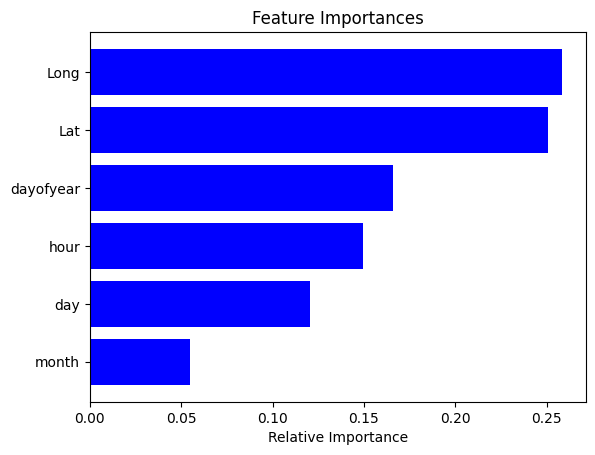

In [33]:
features = data1.iloc[:, [1, 2, 3, 4, 5, 6]] 
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features.columns)  # Use column names directly
plt.xlabel('Relative Importance')


## Tree Visualization

In [34]:

feature_names=[ 'day', 'dayofyear', 'hour', 'month','Lat', 'Long']

In [35]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import io
import pydotplus
import os

# Add the Graphviz bin directory to the PATH environment variable
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Define the feature names
feature_names = ['day', 'dayofyear', 'hour', 'month', 'Lat', 'Long']

# Create a StringIO object to hold the DOT data
dot_data = io.StringIO()

# Export the decision tree to DOT format
export_graphviz(dtree, out_file=dot_data, feature_names=feature_names, filled=True)

# Create a PydotPlus graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the decision tree as an image
Image(graph.create_png())

KeyboardInterrupt: 

## Creating & Training Random Tree Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred=rfc.predict(X_test)

In [38]:
rfc.score(X_test,y_test)

0.4689333333333333

In [39]:
rfc.score(X_train,y_train)

0.9958832647210787

In [40]:
om=rfc.feature_importances_
indices = np.argsort(om)


In [41]:
om

array([0.06106178, 0.13904362, 0.12509709, 0.16374328, 0.25796835,
       0.25308588])

In [42]:
features = data1.columns

In [43]:
import joblib


In [44]:
joblib.dump(rfc, 'rf_model.pkl')


['rf_model.pkl']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_names)  # Use feature_names list directly
plt.xlabel('Relative Importance')



In [ ]:
!ipython nbconvert --to slides CrimePrediction.ipynb

In [ ]:
!ipython nbconvert --to pdf CrimePrediction.ipynb